<a href="https://colab.research.google.com/github/DanielCastanon815/SemanaTec-Mar-22/blob/main/6_3_Actividad_Regresion_Lineal_Equipo7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad

- **Nombre**: 
           Neil Hernández
           Daniel Gerardo Castañón Sarmiento 
           Eduardo N. Diaz Lopez
- **Matrícula**: 
           A01284713
           A01284991 
           A01722009

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


#**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

drive.mount('/gdrive')

%cd '/gdrive/MyDrive/SemanaTec/arte-analitica'

pr = pd.read_csv('data/presion.csv')
pr

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/SemanaTec/arte-analitica


,edad,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406
6,44,122.945012,93.051815
7,45,123.417437,93.167767
8,46,128.783080,89.546531
9,47,125.049072,93.523873


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión ( alta y baja) 


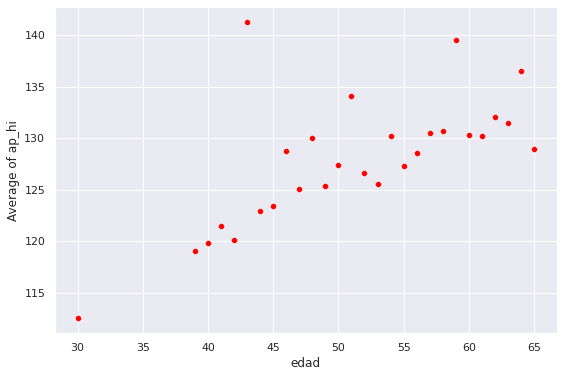

In [ ]:
# alta
plt.figure(figsize=(9,6))
sns.scatterplot(data=pr, x='edad',y='Average of ap_hi', color = 'red')



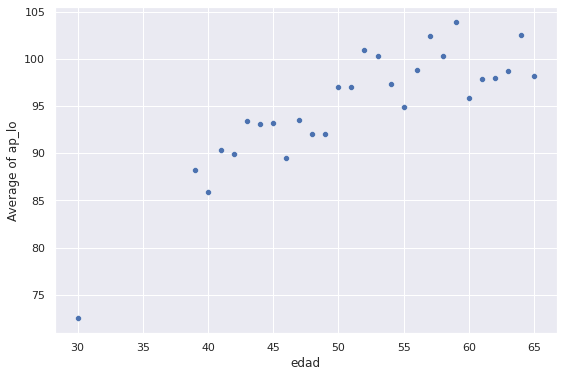

In [ ]:
# baja
plt.figure(figsize=(9,6))
sns.scatterplot(data=pr, x='edad',y='Average of ap_lo')

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**.

¿Cuál es el valor de a y cuál es el valor de b para la presión alta y baja?

b:  103.3969740964366
a:  [0.47769703]
Score:  0.4590368035910293 



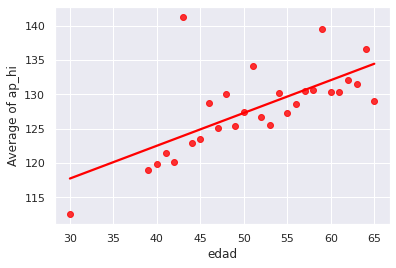

In [ ]:
# alta
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(pr[['edad']], pr['Average of ap_hi'])
print('b: ', lm.intercept_)
print('a: ', lm.coef_)
print('Score: ', lm.score(pr[['edad']], pr['Average of ap_hi']), '\n')

sns.regplot(data=pr, x='edad',y='Average of ap_hi', ci=None, color='red')


b:  63.726200409422745
a:  [0.60898106]
Score:  0.7129328807839572 



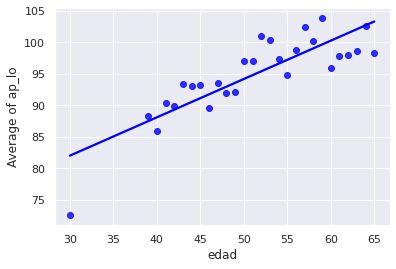

In [ ]:
# baja

lm2 = LinearRegression()
lm2.fit(pr[['edad']], pr['Average of ap_lo'])
print('b: ', lm2.intercept_)
print('a: ', lm2.coef_)
print('Score: ', lm2.score(pr[['edad']], pr['Average of ap_lo']), '\n')

sns.regplot(data=pr, x='edad',y='Average of ap_lo', ci=None, color='blue')


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

Text(0, 0.5, 'Average of ap_hi')

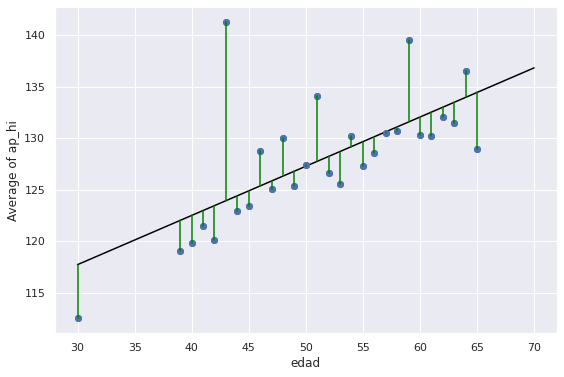

In [ ]:
# alta

plt.figure(figsize=(9,6))
#x = pr.get('edad')
#y = pr.get('Average of ap_hi')
x = np.array(pr.get('edad'))
y = np.array(pr.get('Average of ap_hi'))


model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(30, 70, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");
plt.xlabel('edad')
plt.ylabel('Average of ap_hi')


Text(0, 0.5, 'Average of ap_lo')

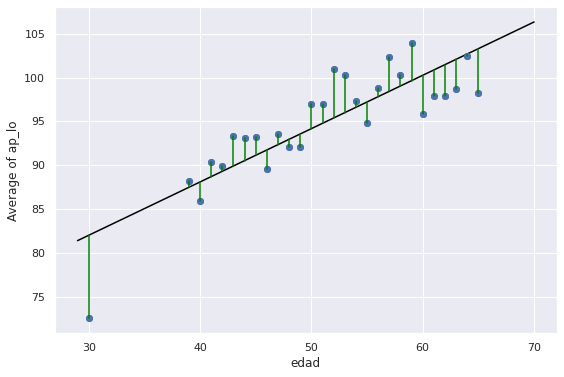

In [ ]:
# baja

plt.figure(figsize=(9,6))
x = np.array(pr.get('edad'))
y = np.array(pr.get('Average of ap_lo'))

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(29, 70, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");
plt.xlabel('edad')
plt.ylabel('Average of ap_lo')


5. ¿Cuál es la presión arterial hi y lo esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
#alta

edad_calcular= 76

def presionHi(edad):

  return 0.47769703*edad+103.3969740964366

presionHi(edad_calcular)

139.7019483764366

In [ ]:
#baja

def presionLo(edad):

  return 0.60898106*edad+63.726200409422745

presionLo(edad_calcular)

110.00876096942275

6. Conclusiones 

 matrícula- Nombre alumno : detalle





#Opcion: **Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

1.a. Carga los datos del archivo insurance.csv 

In [ ]:
ins = pd.read_csv('data/insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

In [ ]:

ins.drop('age', axis = 1, inplace = True)
ins.drop('bmi', axis = 1, inplace = True)
ins.drop('children', axis = 1, inplace = True)


#smoke
for count in ins['smoker']:
  if(count == 'yes'):
    ins.replace(to_replace = 'yes', value = '1', inplace = True)
  else:
    ins.replace(to_replace = 'no', value = '0', inplace = True)

#region
for count in ins['region']:
  if(count == 'northeast'):
    ins.replace(to_replace = 'northeast', value = '0', inplace = True)
  elif(count == 'southeast'):
    ins.replace(to_replace = 'southeast', value = '1', inplace = True)
  elif(count == 'southwest'):
    ins.replace(to_replace = 'southwest', value = '2', inplace = True)
  else:
    ins.replace(to_replace = 'northwest', value = '3', inplace = True)

#sex
for count in ins['sex']:
  if(count == 'male'):
    ins.replace(to_replace = 'male', value = '0', inplace = True)
  else:
   ins.replace(to_replace = 'female', value = '1', inplace = True)

ins

,sex,smoker,region,charges
0,1,1,2,16884.92400
1,0,0,1,1725.55230
2,0,0,1,4449.46200
3,0,0,3,21984.47061
4,0,0,3,3866.85520
...,...,...,...,...
1333,0,0,3,10600.54830
1334,1,0,0,2205.98080
1335,1,0,1,1629.83350
1336,1,0,2,2007.94500


2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

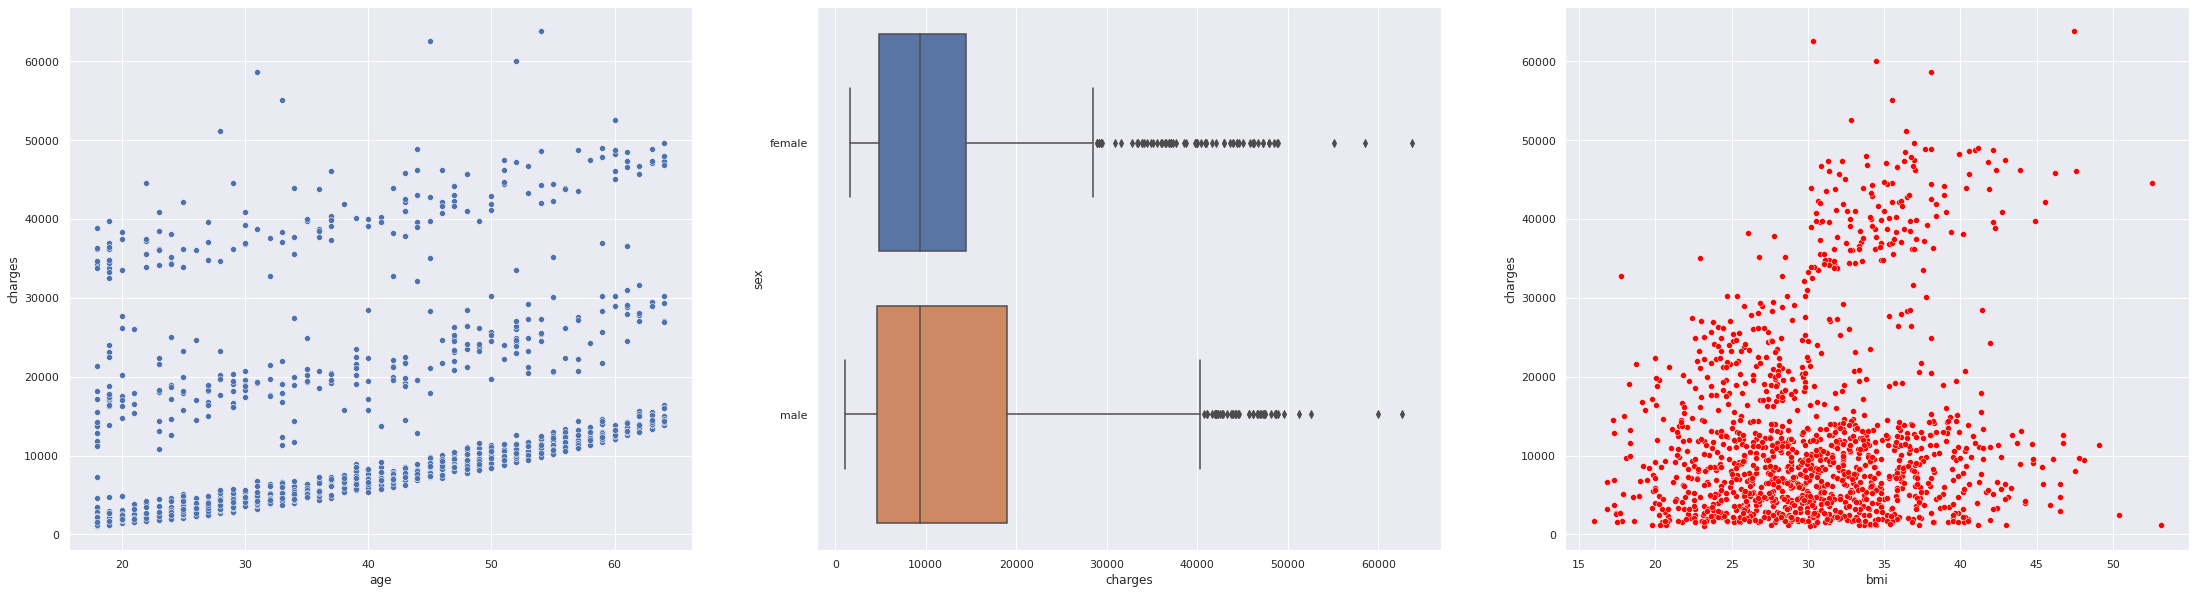

In [ ]:
ins = pd.read_csv('data/insurance.csv')
fig, axs = plt.subplots(1, 3, figsize=(38,10))
#ins = pd.read_csv('data/insurance.csv')
sns.scatterplot(data=ins, x='age',y='charges', ax = axs[0])
sns.boxplot(data=ins, x = 'charges', y='sex', ax=axs[1])
sns.scatterplot(data=ins, x='bmi',y='charges', ax = axs[2], color = 'red')


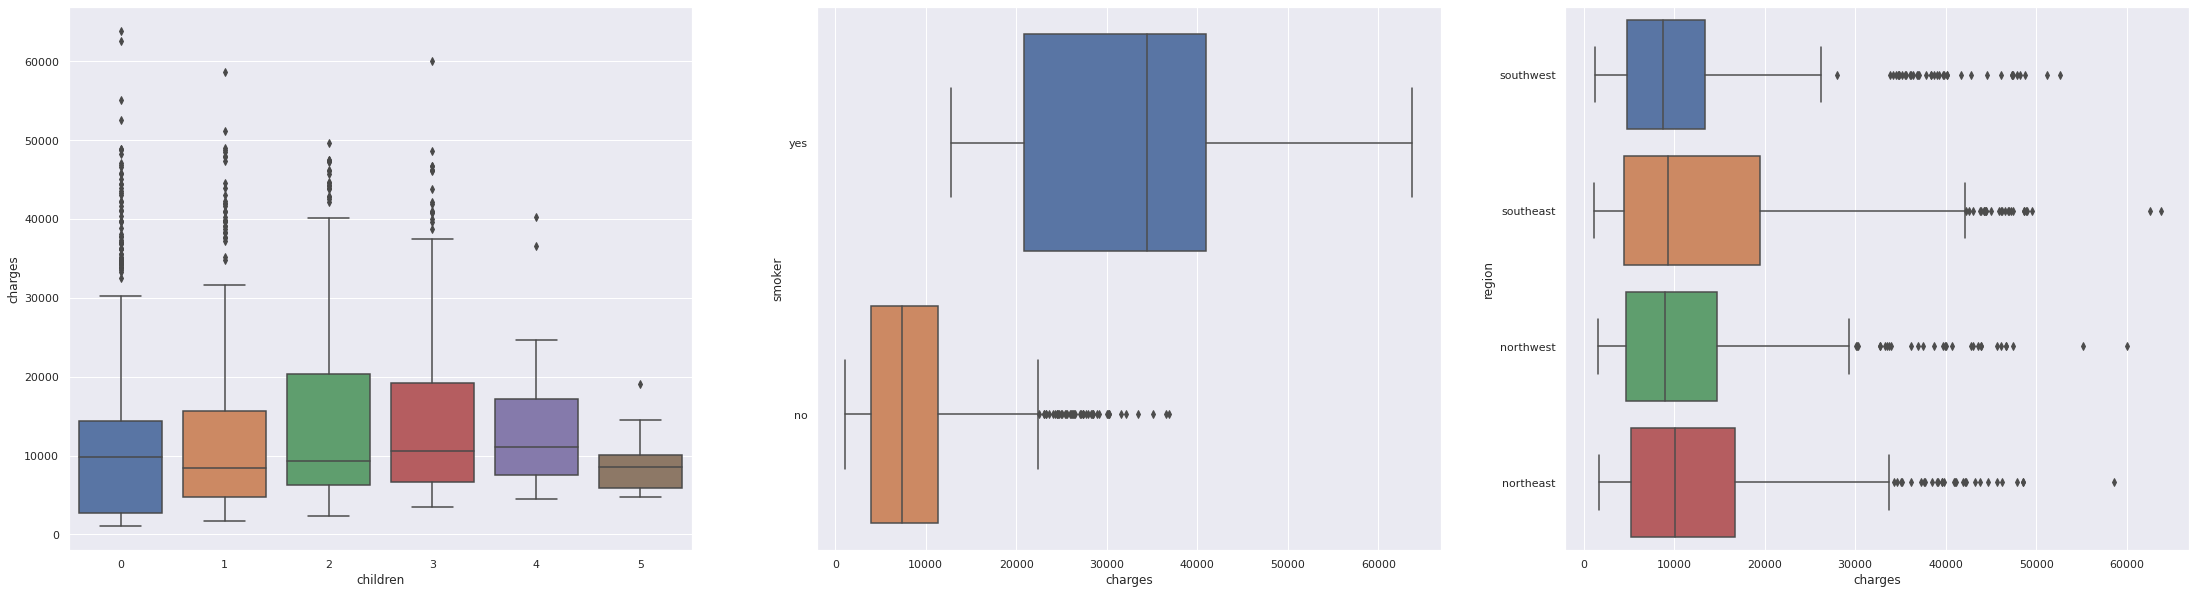

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(38,10))
#ins = pd.read_csv('data/insurance.csv')
sns.boxplot(data=ins, x='children', y='charges', ax = axs[0])
sns.boxplot(data=ins, x = 'charges', y = 'smoker', ax=axs[1])
sns.boxplot(data=ins, x='charges',y='region', ax = axs[2])


3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

In [ ]:
# Gráfica 1: Mientras la persona va envejeciendo, el cargo es mayor. Pero en todal las edades hay cargos más elevados.

#Gráfica 2: Ambos tienen la media en la misma posición, los hombres presentas mayores cargos pero cuando la persona es mujer hay más excepciones. 

#Gráfica 3: Presenta menos cargos si la persona está al principio o al final en la escala de masa corporal. Si la persona se encuentra en el promedio o cerca del promedio presenta más cargos. 

#Gráfica 4: Tienen un media de cobro relativamente similar, se les cobra más a las personas con dos hijos. El cargo y los datos disminuyen conforme la cantidad de hijos aumenta fuera del promedio (dos hijos).

#Gráfica 5: los cargos son mayores para las personas que fuman. 

#Gráfica 6: Los cargos son mayores para las personas que viven en el sureste. En general las regiones del este tienen un máximo mayor y más excepciones. 

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros?

In [ ]:
#Edad VS Costo 
lm3 = LinearRegression()
lm3.fit(ins[['age']], ins['charges'])
print('Edad VS Costo')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(ins[['age']], ins['charges']), '\n')


#bmi VS Costo
lm4 = LinearRegression()
lm4.fit(ins[['bmi']], ins['charges'])
print('bmi VS Costo')
print('beta_0: ', lm4.intercept_)
print('beta_1: ', lm4.coef_)
print('Score: ', lm4.score(ins[['bmi']], ins['charges']), '\n')


#Niños VS Costo
lm5 = LinearRegression()
lm5.fit(ins[['children']], ins['charges'])
print('Niños VS Costo')
print('beta_0: ', lm5.intercept_)
print('beta_1: ', lm5.coef_)
print('Score: ', lm5.score(ins[['children']], ins['charges']), '\n')






Edad VS Costo
beta_0:  3165.885006063021
beta_1:  [257.72261867]
Score:  0.08940589967885804 

bmi VS Costo
beta_0:  1192.9372089611497
beta_1:  [393.8730308]
Score:  0.03933913991786264 

Niños VS Costo
beta_0:  12522.495549644098
beta_1:  [683.08938248]
Score:  0.004623758854459203 



5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

1.- Edad VS Costo

2.- bmi VS Costo

3.- Children VS Costo



6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

In [ ]:

#region
for count in ins['region']:
  if(count == 'northeast'):
    ins.replace(to_replace = 'northeast', value = '0', inplace = True)
  elif(count == 'southeast'):
    ins.replace(to_replace = 'southeast', value = '1', inplace = True)
  elif(count == 'southwest'):
    ins.replace(to_replace = 'southwest', value = '2', inplace = True)
  else:
    ins.replace(to_replace = 'northwest', value = '3', inplace = True)

ins

#Edad, Niños, Region VS Costo 
lm6 = LinearRegression()
lm6.fit(ins[['age', 'children','region']], ins['charges'])
print('Edad, Niños, Region VS Costo ')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(ins[['age', 'children','region']], ins['charges']), '\n')


ins


Edad, Niños, Region VS Costo 
beta_0:  3477.9425852574423
betas:  [ 255.74320281  576.03582763 -581.99464652]
Score:  0.09528541418900904 



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,2,16884.92400
1,18,male,33.770,1,no,1,1725.55230
2,28,male,33.000,3,no,1,4449.46200
3,33,male,22.705,0,no,3,21984.47061
4,32,male,28.880,0,no,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,3,10600.54830
1334,18,female,31.920,0,no,0,2205.98080
1335,18,female,36.850,0,no,1,1629.83350
1336,21,female,25.800,0,no,2,2007.94500


 7. ¿Cuál modelo es el que nos conviene elegir?

 Consideramos que el modelo que más conviene elegir es Edad, Niños, Region VS Costo 

*Escibe aquí...*.

8. Conclusiones 

A01284991-Daniel Castañón: 

- Considero que las herramientas que hemos estado usando durante el transcurso de esta semana y el conocimiento de cómo utilizarlas es muy útil para facilitar el análisis de datos lo cual podría servir de gran ayuda en nuestras vidas estudiantiles en general.  


A01722009-Eduardo N. Diaz Lopez

- Lo visto durante estos dias y en esta atividad son recursos muy valiosos. La analitica es una cosa muy importante dentro de nuestras vidas ya que te abre la puerta en la hora de tomar desiciones y de obtener resultados y conclusiones.

A01284713-Neil Hernández Osorio

-  Personalmente creo que todas las herramientas que aprendimos durante este periodo son de mucha ayuda al querer analizar ciertos datos para predecir algo en el futuro. Ahora bien, en esta tarea logré ver que la mejor forma de modelar algo es con una regresión lineal multiple pues de esta forma se consideran mas datos y el modelo es mas exacto.

 matrícula- Nombre alumno : detalle